<a href="https://colab.research.google.com/github/Chandradithya8/Artificial_Neural_network/blob/main/Diabetes_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
df=pd.read_csv("/content/diabetes.csv.txt")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
x=df.drop('Outcome',axis=1).values
y=df['Outcome'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
class ANN(nn.Module):
  def __init__(self,inp_features=8,hidden_layer1=20,hidden_layer2=20,output_layer=2):
    super().__init__()
    self.f_connected1=nn.Linear(inp_features,hidden_layer1)
    self.f_connected2=nn.Linear(hidden_layer1,hidden_layer2)
    self.out=nn.Linear(hidden_layer2,output_layer)

  def forward(self,x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)   
    return x

In [16]:
model=ANN()
model.parameters

<bound method Module.parameters of ANN(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [7]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [17]:
## backward propagation
loss_fn=nn.CrossEntropyLoss()
optimizers=torch.optim.Adam(model.parameters(),lr=0.01)

In [18]:
epochs=500
final_loss=[]
for i in range(epochs):
  y_pred=model.forward(x_train)
  loss=loss_fn(y_pred,y_train)
  final_loss.append(loss)
  print("Epoch {} and loss {}".format(i,loss))

  optimizers.zero_grad()
  loss.backward()
  optimizers.step()

Epoch 0 and loss 2.0641767978668213
Epoch 1 and loss 1.1305845975875854
Epoch 2 and loss 1.1727263927459717
Epoch 3 and loss 0.9296026825904846
Epoch 4 and loss 0.8355486989021301
Epoch 5 and loss 0.8351221680641174
Epoch 6 and loss 0.7808986902236938
Epoch 7 and loss 0.7212657332420349
Epoch 8 and loss 0.6946214437484741
Epoch 9 and loss 0.7113156914710999
Epoch 10 and loss 0.7359288930892944
Epoch 11 and loss 0.7308465838432312
Epoch 12 and loss 0.6970829367637634
Epoch 13 and loss 0.6555841565132141
Epoch 14 and loss 0.6323952078819275
Epoch 15 and loss 0.6374675035476685
Epoch 16 and loss 0.6516879796981812
Epoch 17 and loss 0.6562557220458984
Epoch 18 and loss 0.645139753818512
Epoch 19 and loss 0.6257045865058899
Epoch 20 and loss 0.6102063059806824
Epoch 21 and loss 0.6076893210411072
Epoch 22 and loss 0.6134693622589111
Epoch 23 and loss 0.6173378825187683
Epoch 24 and loss 0.6149946451187134
Epoch 25 and loss 0.6080360412597656
Epoch 26 and loss 0.6017098426818848
Epoch 27 and

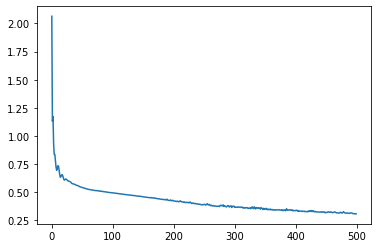

In [20]:
plt.plot(range(epochs),final_loss)

In [22]:
predictions=[]
with torch.no_grad():
  for i in x_test:
    pred=model(i)
    predictions.append(pred.argmax().item())
predictions    

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0]

In [23]:
print(confusion_matrix(predictions,y_test))

[[78 21]
 [21 34]]


In [24]:
print(accuracy_score(predictions,y_test))

0.7272727272727273


In [25]:
torch.save(model,'diabetes.pt')

In [26]:
model=torch.load('diabetes.pt')

In [27]:
model.eval()

ANN(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)